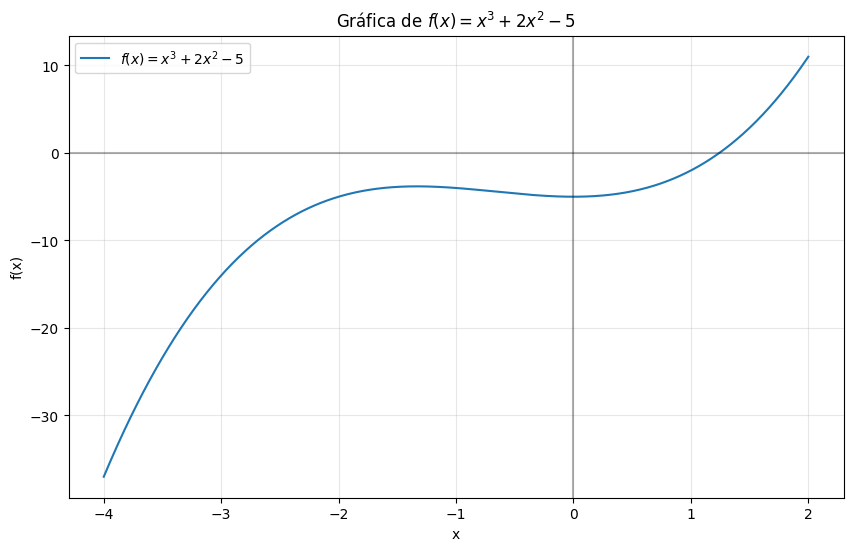

MÉTODO 1: NEWTON

Valor inicial: x0 = 1.0
Raíz encontrada: 1.241896563034796
Valor de f(raíz): 3.0340174816956278e-12
Número de iteraciones: 4
Tabla de iteraciones:
Iter	   x		   f(x)
----------------------------------------
0	1.0000000000	-2.0000000000e+00
1	1.2857142857	4.3148688047e-01
2	1.2430014430	1.0607770139e-02
3	1.2418972909	6.9831806115e-06
4	1.2418965630	3.0340174817e-12

Valor inicial: x0 = -1.0
Raíz encontrada: 1.2418965641814939
Valor de f(raíz): 1.1005034217248522e-08
Número de iteraciones: 9
Tabla de iteraciones:
Iter	   x		   f(x)
----------------------------------------
0	-1.0000000000	-4.0000000000e+00
1	-5.0000000000	-8.0000000000e+01
2	-3.5454545455	-2.4426746807e+01
3	-2.5072963566	-8.1891363113e+00
4	-1.5799184231	-3.9514166385e+00
5	1.8009642020	7.3283211777e+00
6	1.3682133430	1.3053214879e+00
7	1.2504988502	8.2959041946e-02
8	1.2419404050	4.2065289478e-04
9	1.2418965642	1.1005034217e-08

Valor inicial: x0 = -3.0
Raíz encontrada: 1.2418965630357492
Valor de f(r

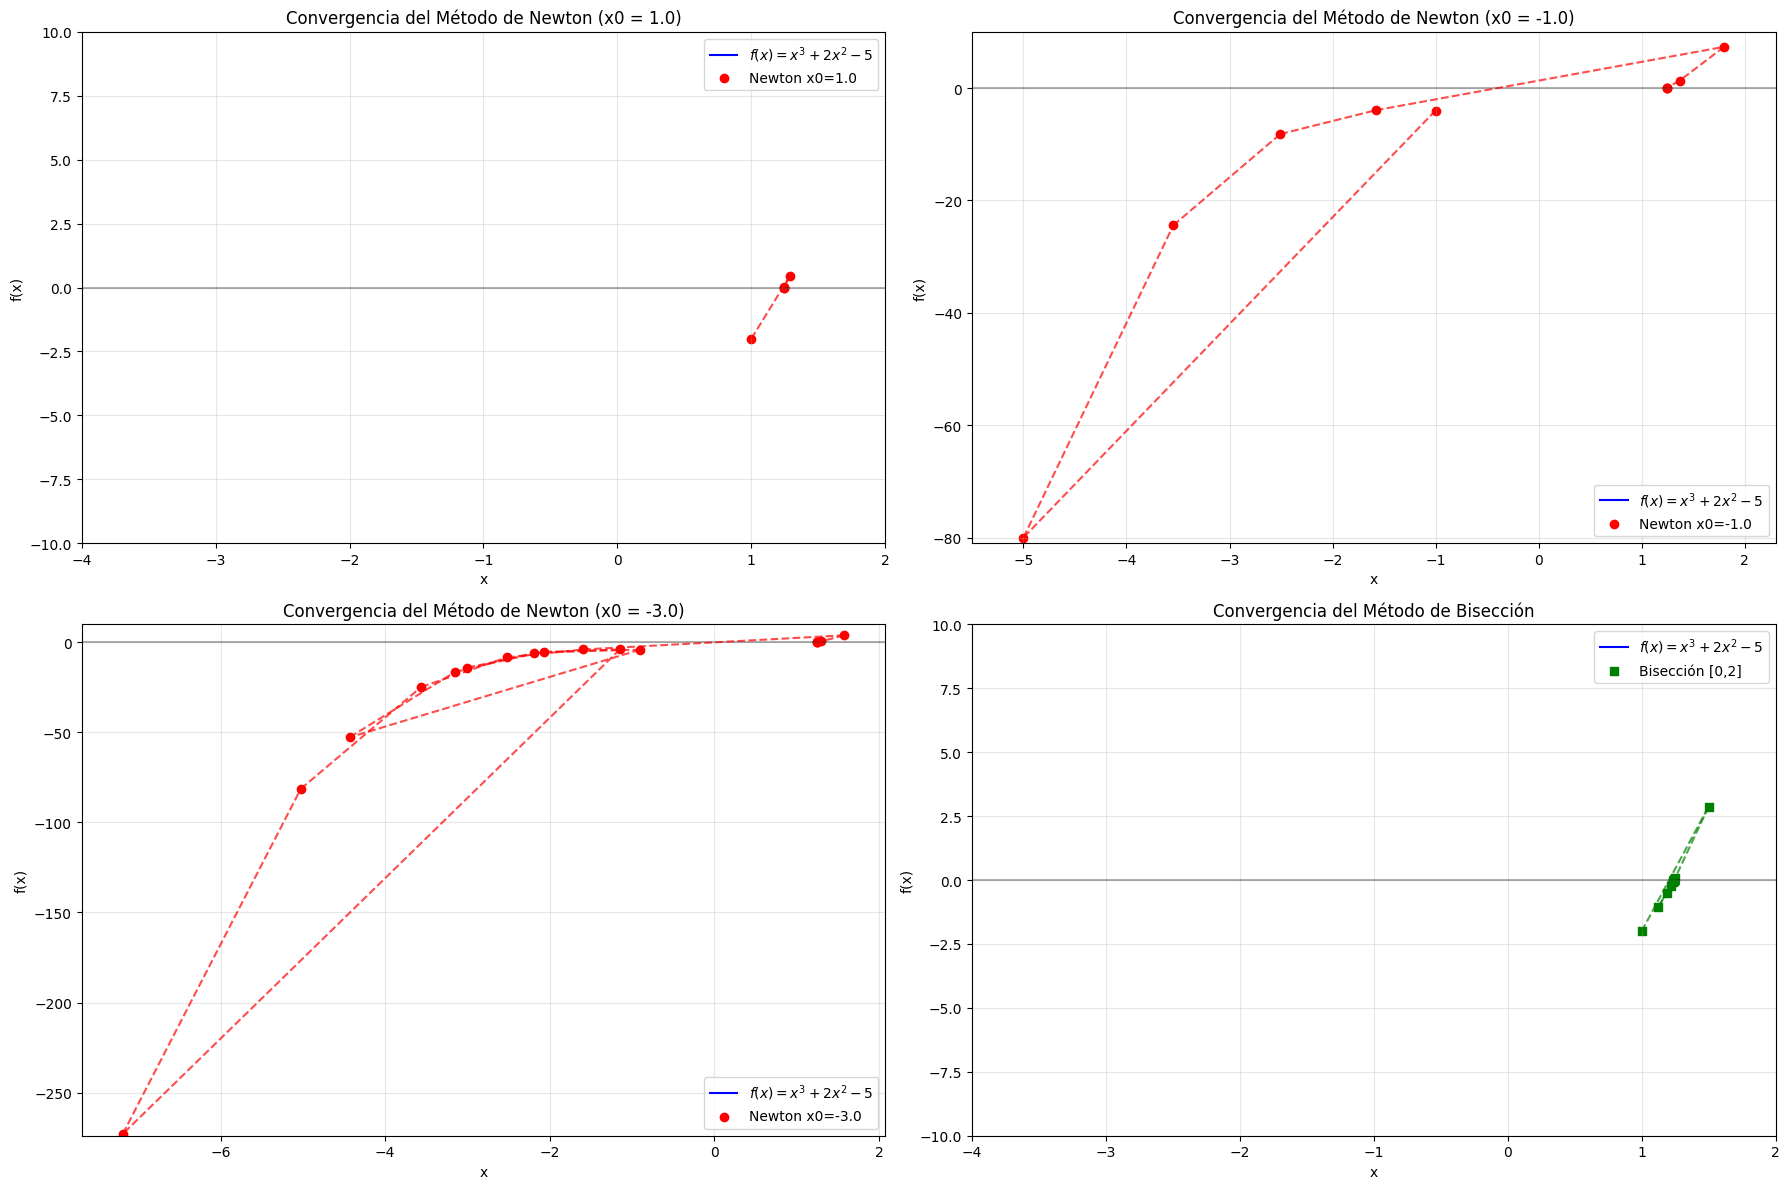



RESUMEN FINAL
Raíces encontradas:
- Método de Newton (x0 = 1.0): x = 1.2418965630
- Método de Newton (x0 = -1.0): x = 1.2418965642
- Método de Newton (x0 = -3.0): x = 1.2418965630
- Método de Bisección [0, 2]: x = 1.2418966293

Comparación de métodos:
1. Método de Newton:
   - Ventajas: Convergencia cuadrática (más rápida)
   - Desventajas: Requiere el cálculo de la derivada y un buen valor inicial
   - Criterio de parada: |f(x)| < tol o |x_new - x| < tol
2. Método de Bisección:
   - Ventajas: Garantiza convergencia si f cambia de signo en el intervalo
   - Desventajas: Convergencia más lenta (lineal)
   - Criterio de parada: |f(x)| < tol o (b-a)/2 < tol

Conclusión:
La función f(x) = x³ + 2x² - 5 tiene una raíz positiva cerca de x = 1.2

El método de Newton converge en menos iteraciones cuando el valor inicial está cerca de la raíz.
El método de Bisección es más robusto pero requiere más iteraciones para alcanzar la misma precisión.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Definimos la función f(x) = x³ + 2x² - 5
def f(x):
    return x**3 + 2*x**2 - 5

# Definimos la derivada de f(x)
def df(x):
    return 3*x**2 + 4*x

# Rango para visualizar la función
x = np.linspace(-4, 2, 1000)
y = f(x)

# Gráfica de la función para visualizar cruces con eje x
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$f(x) = x^3 + 2x^2 - 5$')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de $f(x) = x^3 + 2x^2 - 5$')
plt.show()

# MÉTODO 1: Método de Newton
print("MÉTODO 1: NEWTON")
print("=" * 50)

def newton_method(x0, tol=1e-6, max_iter=100):
    """Implementación propia del método de Newton"""
    iterations = []
    x = x0
    for i in range(max_iter):
        fx = f(x)
        iterations.append((i, x, fx))
        if abs(fx) < tol:
            return x, iterations
        dfx = df(x)
        if dfx == 0:
            raise ValueError("Derivada igual a cero. El método diverge.")
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            x = x_new
            iterations.append((i+1, x, f(x)))
            return x, iterations
        x = x_new
    iterations.append((max_iter, x, f(x)))
    return x, iterations

# Método de Newton con diferentes valores iniciales
initial_guesses = [1.0, -1.0, -3.0]
newton_results = []

for x0 in initial_guesses:
    raiz, iteraciones = newton_method(x0)
    newton_results.append((x0, raiz, iteraciones))
    print(f"\nValor inicial: x0 = {x0}")
    print(f"Raíz encontrada: {raiz}")
    print(f"Valor de f(raíz): {f(raiz)}")
    print(f"Número de iteraciones: {len(iteraciones) - 1}")
    print("Tabla de iteraciones:")
    print("Iter\t   x\t\t   f(x)")
    print("-" * 40)
    for i, x, fx in iteraciones:
        print(f"{i}\t{x:.10f}\t{fx:.10e}")

# MÉTODO 2: Método de Bisección
print("\n\nMÉTODO 2: BISECCIÓN")
print("=" * 50)

def bisection_method(a, b, tol=1e-6, max_iter=100):
    """Implementación propia del método de bisección"""
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo")
    
    iterations = []
    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        iterations.append((i, c, fc))
        
        if abs(fc) < tol or (b - a) / 2 < tol:
            return c, iterations
            
        if f(a) * fc < 0:
            b = c
        else:
            a = c
            
    return c, iterations

# Intervalo para buscar la raíz positiva
a, b = 0, 2
try:
    raiz_positiva, iter_biseccion_pos = bisection_method(a, b)
    print(f"\nIntervalo: [{a}, {b}]")
    print(f"Raíz encontrada: {raiz_positiva}")
    print(f"Valor de f(raíz): {f(raiz_positiva)}")
    print(f"Número de iteraciones: {len(iter_biseccion_pos)}")
    print("Tabla de iteraciones:")
    print("Iter\t   x\t\t   f(x)")
    print("-" * 40)
    for i, x, fx in iter_biseccion_pos:
        print(f"{i}\t{x:.10f}\t{fx:.10e}")
except ValueError as e:
    print(f"Error: {e}")

# Intervalo para buscar la raíz negativa
a, b = -4, -1
try:
    raiz_negativa, iter_biseccion_neg = bisection_method(a, b)
    print(f"\nIntervalo: [{a}, {b}]")
    print(f"Raíz encontrada: {raiz_negativa}")
    print(f"Valor de f(raíz): {f(raiz_negativa)}")
    print(f"Número de iteraciones: {len(iter_biseccion_neg)}")
    print("Tabla de iteraciones:")
    print("Iter\t   x\t\t   f(x)")
    print("-" * 40)
    for i, x, fx in iter_biseccion_neg:
        print(f"{i}\t{x:.10f}\t{fx:.10e}")
except ValueError as e:
    print(f"Error: {e}")

# Comparación gráfica de ambos métodos
# Gráficos separados para cada valor inicial en el método de Newton
plt.figure(figsize=(18, 12))

for idx, (x0, raiz, iteraciones) in enumerate(newton_results):
    plt.subplot(2, 2, idx+1)
    plt.plot(x, f(x), 'b-', label='$f(x) = x^3 + 2x^2 - 5$')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    
    # Extraer puntos (x, f(x)) de las iteraciones
    xs = [it[1] for it in iteraciones]
    fxs = [it[2] for it in iteraciones]
    
    # Graficar puntos de iteración
    plt.scatter(xs, fxs, color='r', marker='o', label=f'Newton x0={x0}')
    
    # Mostrar líneas entre iteraciones
    for i in range(len(xs)-1):
        if i < len(xs) - 1:
            plt.plot([xs[i], xs[i+1]], [fxs[i], fxs[i+1]], 'r--', alpha=0.7)
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Convergencia del Método de Newton (x0 = {x0})')
    plt.legend()
    plt.xlim(min(min(xs)-0.5, -4), max(max(xs)+0.5, 2))
    plt.ylim(min(min(fxs)-1, -10), max(max(fxs)+1, 10))

# Gráfico para el método de bisección
plt.subplot(2, 2, 4)
plt.plot(x, f(x), 'b-', label='$f(x) = x^3 + 2x^2 - 5$')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Extraer puntos de las iteraciones del método de bisección
xs_bis = [it[1] for it in iter_biseccion_pos]
fxs_bis = [it[2] for it in iter_biseccion_pos]

# Graficar puntos de iteración
plt.scatter(xs_bis, fxs_bis, color='g', marker='s', label='Bisección [0,2]')

# Mostrar líneas entre iteraciones
for i in range(len(xs_bis)-1):
    plt.plot([xs_bis[i], xs_bis[i+1]], [fxs_bis[i], fxs_bis[i+1]], 'g--', alpha=0.7)

# Para la raíz negativa si existe
if 'iter_biseccion_neg' in locals():
    xs_bis_neg = [it[1] for it in iter_biseccion_neg]
    fxs_bis_neg = [it[2] for it in iter_biseccion_neg]
    plt.scatter(xs_bis_neg, fxs_bis_neg, color='m', marker='s', label='Bisección [-4,-1]')
    for i in range(len(xs_bis_neg)-1):
        plt.plot([xs_bis_neg[i], xs_bis_neg[i+1]], [fxs_bis_neg[i], fxs_bis_neg[i+1]], 'm--', alpha=0.7)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convergencia del Método de Bisección')
plt.legend()
plt.xlim(-4, 2)
plt.ylim(-10, 10)

plt.tight_layout()
plt.show()

# Resumen de resultados y conclusiones
print("\n\nRESUMEN FINAL")
print("=" * 50)
print("Raíces encontradas:")

for x0, raiz, iteraciones in newton_results:
    if abs(f(raiz)) < 1e-6:  # Verificamos que sea una raíz válida
        print(f"- Método de Newton (x0 = {x0}): x = {raiz:.10f}")

if 'raiz_positiva' in locals():
    print(f"- Método de Bisección [0, 2]: x = {raiz_positiva:.10f}")
    
if 'raiz_negativa' in locals():
    print(f"- Método de Bisección [-4, -1]: x = {raiz_negativa:.10f}")

print("\nComparación de métodos:")
print(f"1. Método de Newton:")
print("   - Ventajas: Convergencia cuadrática (más rápida)")
print("   - Desventajas: Requiere el cálculo de la derivada y un buen valor inicial")
print("   - Criterio de parada: |f(x)| < tol o |x_new - x| < tol")

print(f"2. Método de Bisección:")
print("   - Ventajas: Garantiza convergencia si f cambia de signo en el intervalo")
print("   - Desventajas: Convergencia más lenta (lineal)")
print("   - Criterio de parada: |f(x)| < tol o (b-a)/2 < tol")

print("\nConclusión:")
print("La función f(x) = x³ + 2x² - 5 tiene una raíz positiva cerca de x = 1.2")
if 'raiz_negativa' in locals():
    print("También tiene una raíz negativa cerca de x =", raiz_negativa)
print("\nEl método de Newton converge en menos iteraciones cuando el valor inicial está cerca de la raíz.")
print("El método de Bisección es más robusto pero requiere más iteraciones para alcanzar la misma precisión.")